<div>
<img src="https://lh3.googleusercontent.com/proxy/tO6E7mzeltZO1RKOLGM9UV-a7U9qazRXKtCsAQLS-pj-mDYX3pwC3Dpq3xUYgzPRSZj_HMeXS85GfV0DciAH_CZHjZyxstV7KzDY1OBPsvpGkKjJ4Ij7hBMdlnxujHoJ6rkgi6igBqy_EmpeOkOD8o8UTH7R-nFakk6_2_9yAvpfKF1xWmbBwY4kClJtxSoUxVdo-eYu102Bam5MFl-5uaC5cObRmACTkkbxcw" width="200" align="left"/>
</div>



## Homework 2

A child has available a certain number of ice cream scoops every day, 's'. The child can store a number of scoops for the next day 'a' and eat the remainder scoops c = s − a. The number of scoops available the next day, s′, is equal to the number of scoops stored over night, a, plus an additional scoops provided by the parents, e. The number of scoops available the next day is given by:

s' = a + e'

s' = (s-c) + e'

e' must be known after the decision "a" is made. 

The child can store up to 2 scoops in the fridge every day which implies that a ∈ {0, 1, 2}, s ∈ {0, 1, 2, 3, 4} & e
∈ {0,1,2}.



#### Necessary imports

In [1]:
import sys
import pandas as pd
import numpy as np
import os
from os.path import basename
import platform

import datetime
from datetime import date

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import warnings
warnings.filterwarnings("ignore") # supress warnings

pd.set_option('display.float_format', lambda x: '%.5f' % x)

np.set_printoptions(threshold=sys.maxsize)

# enable ability to see the value of multiple statements at once
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#### Check versions

In [2]:
# Darwin is an open-source Unix-like operating system by Apple
# Darwin forms the core set of components for macOS
platform.system()
platform.release()
platform.version()

# check python version
from platform import python_version
print(python_version())

'Darwin'

'19.6.0'

'Darwin Kernel Version 19.6.0: Sun Jul  5 00:43:10 PDT 2020; root:xnu-6153.141.1~9/RELEASE_X86_64'

3.7.7


In [3]:
print('numpy: %s' % np.__version__)
print('pandas: %s' % pd.__version__)

numpy: 1.19.1
pandas: 1.0.5


In [4]:
print("Your working directory is:") 
%pwd

Your working directory is:


'/Users/colella2/Google Drive/Graduate School/MScA/Courses/Reinforcement Learning/assignments/assignment2'

In [5]:
now = datetime.datetime.now()

print ("Current date and time : ")
print (now.strftime("%Y-%m-%d %H:%M:%S"))

Current date and time : 
2020-08-03 20:06:46


#### The transition probability matrix from e to e′ is given by:

In [6]:
Pt_e = np.array(
            [[0.8, 0.1, 0.1],
            [0.01, 0.98, 0.01],
            [0.1, 0.1, 0.8]]
)

Pt_e

array([[0.8 , 0.1 , 0.1 ],
       [0.01, 0.98, 0.01],
       [0.1 , 0.1 , 0.8 ]])

#### 1) Construct the transition probability from (s, e) to (s′, e′) for each action a ∈ {0, 1, 2}.

In [7]:
col_name = []

for s in range(5):
    for e in range(3):
        col_name.append((s,e))

# prepare (s, e) column names
col_name 

[(0, 0),
 (0, 1),
 (0, 2),
 (1, 0),
 (1, 1),
 (1, 2),
 (2, 0),
 (2, 1),
 (2, 2),
 (3, 0),
 (3, 1),
 (3, 2),
 (4, 0),
 (4, 1),
 (4, 2)]

In [8]:
# return 15 x 15 array without initializing entries
Pt_se = np.empty((15,15))

# fill with NaNs
Pt_se[:] = np.nan

# overlay column names
Pt_se_df = pd.DataFrame(Pt_se, columns=col_name, index=col_name)

# preview result
Pt_se_df

,"(0, 0)","(0, 1)","(0, 2)","(1, 0)","(1, 1)","(1, 2)","(2, 0)","(2, 1)","(2, 2)","(3, 0)","(3, 1)","(3, 2)","(4, 0)","(4, 1)","(4, 2)"
"(0, 0)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(0, 1)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(0, 2)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(1, 0)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(1, 1)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(1, 2)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(2, 0)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(2, 1)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(2, 2)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(3, 0)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [9]:
# given e cannot be larger than s, as s = s(t=t-1) + e, therefore, the probability of transitioning from (s,e) 
# where s < e should be 0


# loop through (s, e) and (s', e') to eliminate rows with 0 probability

for (s,e) in col_name:
    if s < e:
        Pt_se_df.drop([(s,e)], inplace = True)
        
Pt_se_df

,"(0, 0)","(0, 1)","(0, 2)","(1, 0)","(1, 1)","(1, 2)","(2, 0)","(2, 1)","(2, 2)","(3, 0)","(3, 1)","(3, 2)","(4, 0)","(4, 1)","(4, 2)"
"(0, 0)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(1, 0)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(1, 1)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(2, 0)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(2, 1)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(2, 2)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(3, 0)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(3, 1)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(3, 2)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(4, 0)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [10]:
# loop through (s, e) and (s', e') to eliminate columns with 0 probability

for(s_,e_) in col_name: 
    if s_ < e_:
        Pt_se_df.drop(columns=[(s_,e_)], inplace = True)  
        
Pt_se_df

,"(0, 0)","(1, 0)","(1, 1)","(2, 0)","(2, 1)","(2, 2)","(3, 0)","(3, 1)","(3, 2)","(4, 0)","(4, 1)","(4, 2)"
"(0, 0)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(1, 0)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(1, 1)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(2, 0)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(2, 1)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(2, 2)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(3, 0)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(3, 1)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(3, 2)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(4, 0)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [11]:
# view revised list of states after elimination of rows & cols w/ 0 probability
col_name = list(Pt_se_df)
col_name

# review corresponding revised matrix, which is now a 12 x 12
Pt_se_df

[(0, 0),
 (1, 0),
 (1, 1),
 (2, 0),
 (2, 1),
 (2, 2),
 (3, 0),
 (3, 1),
 (3, 2),
 (4, 0),
 (4, 1),
 (4, 2)]

,"(0, 0)","(1, 0)","(1, 1)","(2, 0)","(2, 1)","(2, 2)","(3, 0)","(3, 1)","(3, 2)","(4, 0)","(4, 1)","(4, 2)"
"(0, 0)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(1, 0)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(1, 1)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(2, 0)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(2, 1)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(2, 2)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(3, 0)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(3, 1)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(3, 2)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(4, 0)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [12]:
# create a copy of transition probability matrix for analysis of each action a ∈ {0, 1, 2}
Pt_se_df_0 = Pt_se_df.copy()
Pt_se_df_1 = Pt_se_df.copy()
Pt_se_df_2 = Pt_se_df.copy()

For a = 0, s' must be equal to e', so probability of transitioning to (s',e') where s' != e' should be 0

In [13]:
# looping through (s', e') columns

for (s_,e_) in col_name: # s_ and e_ corresponds to columns
    if s_ != e_:
        Pt_se_df_0.loc[:, (s_,e_)] = 0

        
# transitioning from (s,e) to (s',e') should now only be dependent on transition probability matrix (e,e')
for (s,e) in col_name:
    for(s_,e_) in col_name:
        if Pt_se_df_0.at[(s,e), (s_,e_)] != 0:
            Pt_se_df_0.at[(s,e), (s_,e_)] = Pt_e[e,e_]
            

# view result
Pt_se_df_0

,"(0, 0)","(1, 0)","(1, 1)","(2, 0)","(2, 1)","(2, 2)","(3, 0)","(3, 1)","(3, 2)","(4, 0)","(4, 1)","(4, 2)"
"(0, 0)",0.80000,0,0.10000,0,0,0.10000,0,0,0,0,0,0
"(1, 0)",0.80000,0,0.10000,0,0,0.10000,0,0,0,0,0,0
"(1, 1)",0.01000,0,0.98000,0,0,0.01000,0,0,0,0,0,0
"(2, 0)",0.80000,0,0.10000,0,0,0.10000,0,0,0,0,0,0
"(2, 1)",0.01000,0,0.98000,0,0,0.01000,0,0,0,0,0,0
"(2, 2)",0.10000,0,0.10000,0,0,0.80000,0,0,0,0,0,0
"(3, 0)",0.80000,0,0.10000,0,0,0.10000,0,0,0,0,0,0
"(3, 1)",0.01000,0,0.98000,0,0,0.01000,0,0,0,0,0,0
"(3, 2)",0.10000,0,0.10000,0,0,0.80000,0,0,0,0,0,0
"(4, 0)",0.80000,0,0.10000,0,0,0.10000,0,0,0,0,0,0


For a = 1, s' must be equal to e', therefore, probability on transitioning to (s',e') where s' != e' + 1 should be 0.

In [14]:
# looping through (s', e')
for (s_,e_) in col_name: # s_ and e_ corresponds to columns
    if s_ != e_ + 1:
        Pt_se_df_1.loc[:, (s_,e_)] = 0
        
# transitioning from (s,e) to (s',e') should now only be dependent on transition probability matrix (e,e')
for (s,e) in col_name:
    for(s_,e_) in col_name:
        if Pt_se_df_1.at[(s,e), (s_,e_)] != 0:
            Pt_se_df_1.at[(s,e), (s_,e_)] = Pt_e[e,e_]
            
# view result        
Pt_se_df_1

,"(0, 0)","(1, 0)","(1, 1)","(2, 0)","(2, 1)","(2, 2)","(3, 0)","(3, 1)","(3, 2)","(4, 0)","(4, 1)","(4, 2)"
"(0, 0)",0,0.80000,0,0,0.10000,0,0,0,0.10000,0,0,0
"(1, 0)",0,0.80000,0,0,0.10000,0,0,0,0.10000,0,0,0
"(1, 1)",0,0.01000,0,0,0.98000,0,0,0,0.01000,0,0,0
"(2, 0)",0,0.80000,0,0,0.10000,0,0,0,0.10000,0,0,0
"(2, 1)",0,0.01000,0,0,0.98000,0,0,0,0.01000,0,0,0
"(2, 2)",0,0.10000,0,0,0.10000,0,0,0,0.80000,0,0,0
"(3, 0)",0,0.80000,0,0,0.10000,0,0,0,0.10000,0,0,0
"(3, 1)",0,0.01000,0,0,0.98000,0,0,0,0.01000,0,0,0
"(3, 2)",0,0.10000,0,0,0.10000,0,0,0,0.80000,0,0,0
"(4, 0)",0,0.80000,0,0,0.10000,0,0,0,0.10000,0,0,0


For a = 2, s' must be equal to e', therefore, probability on transitioning to (s',e') where s' != e' + 2 should be 0.

In [15]:
#looping through (s', e')
for (s_,e_) in col_name: # s_ and e_ corresponds to columns
    if s_ != e_ + 2:
        Pt_se_df_2.loc[:, (s_,e_)] = 0
        
# transitioning from (s,e) to (s',e') should now only be dependent on transition probability matrix (e,e')
for (s,e) in col_name:
    for(s_,e_) in col_name:
        if Pt_se_df_2.at[(s,e), (s_,e_)] != 0:
            Pt_se_df_2.at[(s,e), (s_,e_)] = Pt_e[e,e_]
            
            
# view result
Pt_se_df_2

,"(0, 0)","(1, 0)","(1, 1)","(2, 0)","(2, 1)","(2, 2)","(3, 0)","(3, 1)","(3, 2)","(4, 0)","(4, 1)","(4, 2)"
"(0, 0)",0,0,0,0.80000,0,0,0,0.10000,0,0,0,0.10000
"(1, 0)",0,0,0,0.80000,0,0,0,0.10000,0,0,0,0.10000
"(1, 1)",0,0,0,0.01000,0,0,0,0.98000,0,0,0,0.01000
"(2, 0)",0,0,0,0.80000,0,0,0,0.10000,0,0,0,0.10000
"(2, 1)",0,0,0,0.01000,0,0,0,0.98000,0,0,0,0.01000
"(2, 2)",0,0,0,0.10000,0,0,0,0.10000,0,0,0,0.80000
"(3, 0)",0,0,0,0.80000,0,0,0,0.10000,0,0,0,0.10000
"(3, 1)",0,0,0,0.01000,0,0,0,0.98000,0,0,0,0.01000
"(3, 2)",0,0,0,0.10000,0,0,0,0.10000,0,0,0,0.80000
"(4, 0)",0,0,0,0.80000,0,0,0,0.10000,0,0,0,0.10000


#### 2) The child subjected utility from eating ice cream is log( c + 1) if c ≥ 0 and −∞ otherwise.  Construct the reward matrix for each transition (s, e, a) and (s′, e′).

In [16]:
# construct reward function
def reward(c):
    if c >= 0:
        return np.log(c + 1)
    else:
        return -8000000000.0 # placeholder for negative infinity
    

# apply function to get (s, e, a) combos
reward_row = []

for a in range(3):
    for (s,e) in col_name:
        reward_row.append((s,e,a))

# view result
reward_row

[(0, 0, 0),
 (1, 0, 0),
 (1, 1, 0),
 (2, 0, 0),
 (2, 1, 0),
 (2, 2, 0),
 (3, 0, 0),
 (3, 1, 0),
 (3, 2, 0),
 (4, 0, 0),
 (4, 1, 0),
 (4, 2, 0),
 (0, 0, 1),
 (1, 0, 1),
 (1, 1, 1),
 (2, 0, 1),
 (2, 1, 1),
 (2, 2, 1),
 (3, 0, 1),
 (3, 1, 1),
 (3, 2, 1),
 (4, 0, 1),
 (4, 1, 1),
 (4, 2, 1),
 (0, 0, 2),
 (1, 0, 2),
 (1, 1, 2),
 (2, 0, 2),
 (2, 1, 2),
 (2, 2, 2),
 (3, 0, 2),
 (3, 1, 2),
 (3, 2, 2),
 (4, 0, 2),
 (4, 1, 2),
 (4, 2, 2)]

In [17]:
# return 36 X 12 array without initializing entries
R_sea = np.empty((len(reward_row),len(col_name)))

# fill with NaNs
R_sea[:] = np.nan

# overlay column names
R_sea_df = pd.DataFrame(R_sea, columns=col_name, index=reward_row)

# view result
R_sea_df

,"(0, 0)","(1, 0)","(1, 1)","(2, 0)","(2, 1)","(2, 2)","(3, 0)","(3, 1)","(3, 2)","(4, 0)","(4, 1)","(4, 2)"
"(0, 0, 0)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(1, 0, 0)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(1, 1, 0)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(2, 0, 0)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(2, 1, 0)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(2, 2, 0)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(3, 0, 0)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(3, 1, 0)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(3, 2, 0)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(4, 0, 0)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [18]:
# apply reward function 

# reward is dependent on availability of ice cream, s, at the initial state
for (s,e,a) in reward_row:
    c = s - a
    R_sea_df.loc[(s,e,a),:] = reward(c)
    
# view result
R_sea_df

,"(0, 0)","(1, 0)","(1, 1)","(2, 0)","(2, 1)","(2, 2)","(3, 0)","(3, 1)","(3, 2)","(4, 0)","(4, 1)","(4, 2)"
"(0, 0, 0)",0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
"(1, 0, 0)",0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315
"(1, 1, 0)",0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315
"(2, 0, 0)",1.09861,1.09861,1.09861,1.09861,1.09861,1.09861,1.09861,1.09861,1.09861,1.09861,1.09861,1.09861
"(2, 1, 0)",1.09861,1.09861,1.09861,1.09861,1.09861,1.09861,1.09861,1.09861,1.09861,1.09861,1.09861,1.09861
"(2, 2, 0)",1.09861,1.09861,1.09861,1.09861,1.09861,1.09861,1.09861,1.09861,1.09861,1.09861,1.09861,1.09861
"(3, 0, 0)",1.38629,1.38629,1.38629,1.38629,1.38629,1.38629,1.38629,1.38629,1.38629,1.38629,1.38629,1.38629
"(3, 1, 0)",1.38629,1.38629,1.38629,1.38629,1.38629,1.38629,1.38629,1.38629,1.38629,1.38629,1.38629,1.38629
"(3, 2, 0)",1.38629,1.38629,1.38629,1.38629,1.38629,1.38629,1.38629,1.38629,1.38629,1.38629,1.38629,1.38629
"(4, 0, 0)",1.60944,1.60944,1.60944,1.60944,1.60944,1.60944,1.60944,1.60944,1.60944,1.60944,1.60944,1.60944


In [19]:
# create a copy of transition probability matrix for analysis of rewards for each action a∈{0, 1, 2}
R_se_df_0 = Pt_se_df.copy()
R_se_df_1 = Pt_se_df.copy()
R_se_df_2 = Pt_se_df.copy()

In [20]:
# reward matrix for all values for a
# eating all the ice cream is (s = c)

a = 0
for (s,e) in col_name:
    c = s - a
    R_se_df_0.loc[(s,e),:] = reward(c)
      
a = 1
for (s,e) in col_name:
    c = s - a
    R_se_df_1.loc[(s,e),:] = reward(c)

a = 2
for (s,e) in col_name:
    c = s - a
    R_se_df_2.loc[(s,e),:] = reward(c)

In [21]:
# immediate expected rewards in 0-2 neighborhood
R_se_df_0

,"(0, 0)","(1, 0)","(1, 1)","(2, 0)","(2, 1)","(2, 2)","(3, 0)","(3, 1)","(3, 2)","(4, 0)","(4, 1)","(4, 2)"
"(0, 0)",0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
"(1, 0)",0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315
"(1, 1)",0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315
"(2, 0)",1.09861,1.09861,1.09861,1.09861,1.09861,1.09861,1.09861,1.09861,1.09861,1.09861,1.09861,1.09861
"(2, 1)",1.09861,1.09861,1.09861,1.09861,1.09861,1.09861,1.09861,1.09861,1.09861,1.09861,1.09861,1.09861
"(2, 2)",1.09861,1.09861,1.09861,1.09861,1.09861,1.09861,1.09861,1.09861,1.09861,1.09861,1.09861,1.09861
"(3, 0)",1.38629,1.38629,1.38629,1.38629,1.38629,1.38629,1.38629,1.38629,1.38629,1.38629,1.38629,1.38629
"(3, 1)",1.38629,1.38629,1.38629,1.38629,1.38629,1.38629,1.38629,1.38629,1.38629,1.38629,1.38629,1.38629
"(3, 2)",1.38629,1.38629,1.38629,1.38629,1.38629,1.38629,1.38629,1.38629,1.38629,1.38629,1.38629,1.38629
"(4, 0)",1.60944,1.60944,1.60944,1.60944,1.60944,1.60944,1.60944,1.60944,1.60944,1.60944,1.60944,1.60944


In [22]:
# combine all transition probabilities into one array
P = np.array([Pt_se_df_0, Pt_se_df_1, Pt_se_df_2],dtype=float)
P.shape

P

(3, 12, 12)

array([[[0.8 , 0.  , 0.1 , 0.  , 0.  , 0.1 , 0.  , 0.  , 0.  , 0.  ,
         0.  , 0.  ],
        [0.8 , 0.  , 0.1 , 0.  , 0.  , 0.1 , 0.  , 0.  , 0.  , 0.  ,
         0.  , 0.  ],
        [0.01, 0.  , 0.98, 0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.  ,
         0.  , 0.  ],
        [0.8 , 0.  , 0.1 , 0.  , 0.  , 0.1 , 0.  , 0.  , 0.  , 0.  ,
         0.  , 0.  ],
        [0.01, 0.  , 0.98, 0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.  ,
         0.  , 0.  ],
        [0.1 , 0.  , 0.1 , 0.  , 0.  , 0.8 , 0.  , 0.  , 0.  , 0.  ,
         0.  , 0.  ],
        [0.8 , 0.  , 0.1 , 0.  , 0.  , 0.1 , 0.  , 0.  , 0.  , 0.  ,
         0.  , 0.  ],
        [0.01, 0.  , 0.98, 0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.  ,
         0.  , 0.  ],
        [0.1 , 0.  , 0.1 , 0.  , 0.  , 0.8 , 0.  , 0.  , 0.  , 0.  ,
         0.  , 0.  ],
        [0.8 , 0.  , 0.1 , 0.  , 0.  , 0.1 , 0.  , 0.  , 0.  , 0.  ,
         0.  , 0.  ],
        [0.01, 0.  , 0.98, 0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.  ,
         0.  , 0.  ],

In [23]:
# combine all rewards into one array
RR = np.array([R_se_df_0, R_se_df_1, R_se_df_2],dtype=float)
RR.shape

RR

(3, 12, 12)

array([[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 6.93147181e-01,  6.93147181e-01,  6.93147181e-01,
          6.93147181e-01,  6.93147181e-01,  6.93147181e-01,
          6.93147181e-01,  6.93147181e-01,  6.93147181e-01,
          6.93147181e-01,  6.93147181e-01,  6.93147181e-01],
        [ 6.93147181e-01,  6.93147181e-01,  6.93147181e-01,
          6.93147181e-01,  6.93147181e-01,  6.93147181e-01,
          6.93147181e-01,  6.93147181e-01,  6.93147181e-01,
          6.93147181e-01,  6.93147181e-01,  6.93147181e-01],
        [ 1.09861229e+00,  1.09861229e+00,  1.09861229e+00,
          1.09861229e+00,  1.09861229e+00,  1.09861229e+00,
          1.09861229e+00,  1.09861229e+00,  1.09861229e+00,
          1.09861229e+00,  1.09861229e+00,  1.09861229e+00],
        [ 1.09861229e+00,  1.0986122

#### 3) Apply the value iteration approach to compute the value function for each state and optimal policy. Iterate 600 times.

In [24]:
K,N,M = P.shape

# instantiate expected reward matrix
q = np.zeros((K,N,1), dtype=np.float64)# create three 12 x 1 arrays
q.shape


# loop through each (K,N,M) array
for i in range(0,N): # N is 12
    for k in range(0,K): # K is 3
        for j in range(0,M): # M is 2
            q[k,i,0] = q[k,i,0] + RR[k,i,j]*P[k,i,j]

# view result
q

(3, 12, 1)

array([[[ 0.00000000e+00],
        [ 6.93147181e-01],
        [ 6.93147181e-01],
        [ 1.09861229e+00],
        [ 1.09861229e+00],
        [ 1.09861229e+00],
        [ 1.38629436e+00],
        [ 1.38629436e+00],
        [ 1.38629436e+00],
        [ 1.60943791e+00],
        [ 1.60943791e+00],
        [ 1.60943791e+00]],

       [[-8.00000000e+09],
        [ 0.00000000e+00],
        [ 0.00000000e+00],
        [ 6.93147181e-01],
        [ 6.93147181e-01],
        [ 6.93147181e-01],
        [ 1.09861229e+00],
        [ 1.09861229e+00],
        [ 1.09861229e+00],
        [ 1.38629436e+00],
        [ 1.38629436e+00],
        [ 1.38629436e+00]],

       [[-8.00000000e+09],
        [-8.00000000e+09],
        [-8.00000000e+09],
        [ 0.00000000e+00],
        [ 0.00000000e+00],
        [ 0.00000000e+00],
        [ 6.93147181e-01],
        [ 6.93147181e-01],
        [ 6.93147181e-01],
        [ 1.09861229e+00],
        [ 1.09861229e+00],
        [ 1.09861229e+00]]])

In [25]:
# number of episodes
T = 600

# value table
v = np.zeros((N,T),dtype=np.float64) # N is 12
v.shape
v

# decisions table
d = np.zeros((N,T),dtype=np.float64)
d.shape
d

(12, 600)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

(12, 600)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [26]:
for n in range(1,T): # T is 600; have to start n at 1 b/c below access n-1 th element
    # y0 = 12 # fails without this line
    for i in range(0,N): # N is 12
            # if i==y0:
                # rhs should be 1 x 3 and will initially be all zeroes
                rhs = np.zeros((1,K),dtype=np.float64) # K is 3
                for k in range(0,K):
                    # access kth element from rhs; rhs[0] is (0,0,0)
                    # q[k][i][0] accesses actual number within 12-item array
                    rhs[0][k] = q[k][i][0] + np.matmul(P[k,i,:],v[:,n-1]) # P has 3 arrays that are 12 x 2

                v[i,n] = max(rhs[0])
                d[i,n] = np.argmax(rhs[0])

# value table
v = v.T
v

# decisions table
d = d.T
d

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 6.93147181e-01, 6.93147181e-01, 1.09861229e+00,
        1.09861229e+00, 1.09861229e+00, 1.38629436e+00, 1.38629436e+00,
        1.38629436e+00, 1.60943791e+00, 1.60943791e+00, 1.60943791e+00],
       [1.79175947e-01, 8.72323127e-01, 1.38341754e+00, 1.49615559e+00,
        1.79058164e+00, 2.04681684e+00, 1.90162070e+00, 2.19604675e+00,
        2.38682372e+00, 2.27707535e+00, 2.48426126e+00, 2.67450580e+00],
       [4.86364195e-01, 1.17951138e+00, 2.07115630e+00, 1.80874622e+00,
        2.48050866e+00, 2.89232511e+00, 2.37712691e+00, 2.88697961e+00,
        3.27436174e+00, 2.78259202e+00, 3.29244471e+00, 3.60743716e+00],
       [8.85439497e-01, 1.57858668e+00, 2.75666725e+00, 2.21224332e+00,
        3.16858439e+00, 3.67863858e+00, 2.78958583e+00, 3.57

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 0., 1., 1., 1., 2., 2., 1.],
       [0., 0., 0., 1., 1., 0., 2., 2., 1., 2., 2., 2.],
       [0., 0., 0., 1., 1., 1., 2., 2., 1., 2., 2., 2.],
       [0., 0., 0., 1., 1., 1., 2., 2., 1., 2., 2., 2.],
       [0., 0., 0., 1., 1., 1., 2., 2., 2., 2., 2., 2.],
       [0., 0., 0., 1., 1., 1., 2., 2., 2., 2., 2., 2.],
       [0., 0., 0., 1., 1., 1., 2., 2., 2., 2., 2., 2.],
       [0., 0., 0., 1., 1., 1., 2., 2., 2., 2., 2., 2.],
       [0., 0., 0., 1., 1., 1., 2., 2., 2., 2., 2., 2.],
       [0., 0., 0., 1., 1., 1., 2., 2., 2., 2., 2., 2.],
       [0., 0., 0., 1., 1., 1., 2., 2., 2., 2., 2., 2.],
       [0., 0., 0., 1., 1., 1., 2., 2., 2., 2., 2., 2.],
       [0., 0., 0., 1., 1., 1., 2., 2., 2., 2., 2., 2.],
       [0., 0., 0., 1., 1., 1., 2., 2., 2., 2., 2., 2.],
       [0., 0., 0., 1., 1., 1., 2., 2., 2., 2., 2., 2.],
       [0., 0., 0., 1., 1., 1.,

In [27]:
policy_df = pd.DataFrame(d, columns=col_name)
policy_df

,"(0, 0)","(1, 0)","(1, 1)","(2, 0)","(2, 1)","(2, 2)","(3, 0)","(3, 1)","(3, 2)","(4, 0)","(4, 1)","(4, 2)"
0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
1,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,1.00000,1.00000,1.00000,2.00000,2.00000,1.00000
3,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,2.00000,2.00000,1.00000,2.00000,2.00000,2.00000
4,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,2.00000,2.00000,1.00000,2.00000,2.00000,2.00000
...,...,...,...,...,...,...,...,...,...,...,...,...
595,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000
596,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000
597,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000
598,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000


#### 4) For each e, plot the value function v(s, e) with s on the x-axis. (hint: there should be 3 lines plots, one for each e ∈ {0, 1, 2}.)

In [28]:
# take values at bottom of value table you calculate in three for the (s, e) pairs
# look up the value for the different states and scoops given combinations
# can put put none for infeasible states like (0, 1) since can't have 0 if just given a scoop

value_data = {'iter': [*range(T)], 
              'value (0,0)': v[:,0], 'value (1,0)': v[:,1], 'value (1,1)': v[:,2], 
              'value (2,0)': v[:,3], 'value (2,1)': v[:,4], 'value (2,2)': v[:,5], 'value (3,0)': v[:,6], 
              'value (3,1)': v[:,7], 'value (3,2)': v[:,8], 'value (4,0)': v[:,9], 'value (4,1)': v[:,10], 
              'value (4,2)': v[:,11]}

values = pd.DataFrame(value_data)

values

,iter,"value (0,0)","value (1,0)","value (1,1)","value (2,0)","value (2,1)","value (2,2)","value (3,0)","value (3,1)","value (3,2)","value (4,0)","value (4,1)","value (4,2)"
0,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
1,1,0.00000,0.69315,0.69315,1.09861,1.09861,1.09861,1.38629,1.38629,1.38629,1.60944,1.60944,1.60944
2,2,0.17918,0.87232,1.38342,1.49616,1.79058,2.04682,1.90162,2.19605,2.38682,2.27708,2.48426,2.67451
3,3,0.48636,1.17951,2.07116,1.80875,2.48051,2.89233,2.37713,2.88698,3.27436,2.78259,3.29244,3.60744
4,4,0.88544,1.57859,2.75667,2.21224,3.16858,3.67864,2.78959,3.57655,4.08410,3.19505,3.98201,4.45413
...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,595,399.03783,399.73098,401.87991,400.38661,402.44798,402.95003,401.00470,402.97852,403.39302,401.41017,403.38399,403.79849
596,596,399.71326,400.40641,402.55534,401.06203,403.12341,403.62546,401.68013,403.65395,404.06845,402.08560,404.05941,404.47391
597,597,400.38869,401.08184,403.23077,401.73746,403.79883,404.30089,402.35556,404.32938,404.74388,402.76102,404.73484,405.14934
598,598,401.06412,401.75726,403.90620,402.41289,404.47426,404.97632,403.03099,405.00480,405.41930,403.43645,405.41027,405.82477


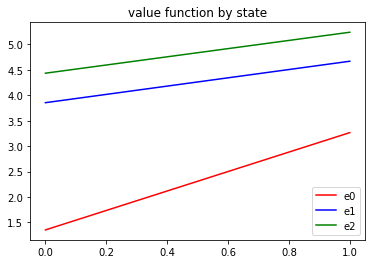

In [29]:
vals = pd.DataFrame({'s': range(2),
                          'e0': [values.iloc[5,1], values.iloc[5,7]],
                          'e1': [values.iloc[5,5], values.iloc[5,11]],
                          'e2': [values.iloc[5,6], values.iloc[5,12]]})

a = plt.plot('s', 'e0', data = vals, color = 'red')
b = plt.plot('s', 'e1', data = vals, color = 'blue')
c = plt.plot('s', 'e2', data = vals, color = 'green')

e = plt.title('value function by state')
j = plt.legend()

#### 5) For each e, plot the optimal policy for storing ice cream scoops a(s, e) with s on the x- axis. (hint: there should be 3 lines plots, one for each e ∈ {0, 1, 2}.)

In [30]:
# same as above but for decision data
policy_data = {'iter': [*range(T)], 
              'policy (0,0)': d[:,0], 'policy (1,0)': d[:,1], 'policy (1,1)': d[:,2], 
              'policy (2,0)': d[:,3], 'policy (2,1)': d[:,4], 'policy (2,2)': d[:,5], 'policy (3,0)': d[:,6], 
              'policy (3,1)': d[:,7], 'policy (3,2)': d[:,8], 'policy (4,0)': d[:,9], 'policy (4,1)': d[:,10], 
              'policy (4,2)': d[:,11]}

policy = pd.DataFrame(policy_data)

policy

,iter,"policy (0,0)","policy (1,0)","policy (1,1)","policy (2,0)","policy (2,1)","policy (2,2)","policy (3,0)","policy (3,1)","policy (3,2)","policy (4,0)","policy (4,1)","policy (4,2)"
0,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
1,1,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2,2,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,1.00000,1.00000,1.00000,2.00000,2.00000,1.00000
3,3,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,2.00000,2.00000,1.00000,2.00000,2.00000,2.00000
4,4,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,2.00000,2.00000,1.00000,2.00000,2.00000,2.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,595,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000
596,596,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000
597,597,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000
598,598,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000


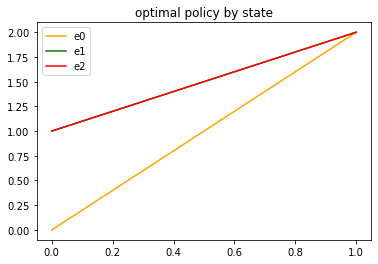

In [31]:
pols = pd.DataFrame({'s': range(2), 
                    'e0': [policy.iloc[4,1], policy.iloc[4,7]],
                    'e1': [policy.iloc[4,5], policy.iloc[4,11]],
                    'e2': [policy.iloc[4,6], policy.iloc[4,12]]})

w = plt.plot('s', 'e0', data = pols, color = 'orange')
x = plt.plot('s', 'e1', data = pols, color = 'green') # green line and red line are plotting on top of one another
y = plt.plot('s', 'e2', data = pols, color = 'red')

p = plt.title('optimal policy by state')
z = plt.legend()

#### 6) For each e, plot the optimal policy for consuming ice cream scoops c(s, e) with s on the x-axis. (hint: there should be 3 lines plots, one for each e ∈ {0, 1, 2}.)

#### 7) Simulate a sequence of e and set an initial value for s. Given the optimal policy, calculate and plot the evolution of a, c, and s over time.

#### 8) Construct the transition probability and reward matrices between (s, e) and (s′, e′) that produces the highest expected discount rewards. (hint: you need to use the optimal policy)

#### 9) Calculate the value function for the Markok process with rewards that produces the highest expected discount rewards. (hint: use the transition probability and reward matrices from the previous question). Does the value function matches reasonably the value function from the previous question? (hint: it should)

#### 10) Simulate the Markov process with rewards from the previous question for starting at each state pair (e, s). Compute the average discounted reward. Does it match reasonabily close to the value function in the previous question? (hint: it should)

#### 11) Calculate the optimal policy based on the policy iteration approach.